# 고양이 수염 스티커 만들기
#### Step 1. 모듈 준비

In [1]:
#주요 라이브러리 버전을 확인해 보고 시작
import os # 환경 변수나 디렉터리, 파일 등의 OS 자원을 제어할 수 있게 해주는 모듈
import cv2 # OpenCV라이브러리 → 컴퓨터 비전 관련 프로그래밍을 쉽게 할 수 있도록 도와주는 라이브러리
import matplotlib.pyplot as plt # 다양한 데이터를 많은 방법으로 도식화 할 수 있도록 하는 라이브러리
import numpy as np # 다차원 배열을 쉽게 처리하고 효율적으로 사용할 수 있도록 하는 라이브러리
import dlib # 이미지 처리 및 기계 학습, 얼굴인식 등을 할 수 있는 c++ 로 개발된 고성능의 라이브러리 



#### Step 2. 스티커 구하기 or 만들기
##### 준비한 이미지 읽기

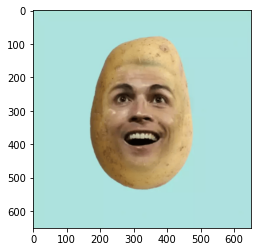

In [2]:
my_image_path = 'aiffel/camera_sticker/images/potato2.png' # 얼굴 이미지가 있는 경로 가져오기

# OpenCV로 이미지를 불러오기
img_bgr = cv2.imread(my_image_path) 

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) #BGR -> RGB
img_show = img_rgb.copy()      # 출력용 이미지를 따로 보관하기

plt.imshow(img_rgb) # 이미지를 출력하기 위해 출력할 이미지를 올려주기 (실제 출력은 하지 않음)
plt.show() # 이미지를 출력해주기 (실제 출력)


#### Step 3. 얼굴 검출 & 랜드마크 검출 하기
##### dlib을 이용해서 얼굴의 bounding box 위치와 landmark의 위치를 찾기

In [3]:
# detector를 선언
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환
# detector_hog를 이용해서 얼굴의 bounding box를 추출
#dlib은 rgb 이미지를 입력으로 받기 때문에 cvtColor() 를 이용해서 opencv 의 bgr 이미지를 rgb로 변환
##detector_hog의 두 번째 파라미터: 이미지 피라미드의 수
###이미지 피라미드: 이미지를 upsampling 방법을 통해 크기를 키우는 것, 이미지 피라미드에서 얼굴을 다시 검출하면 작게 촬영된 얼굴을 크게 볼 수 있기 때문에 더 정확한 검출이 가능
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)

##### 찾은 얼굴을 화면에 출력

rectangles[[(170, 170) (491, 491)]]


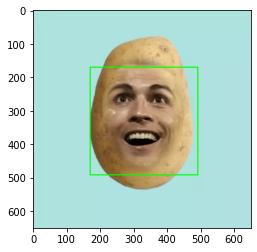

In [4]:
#dlib detector 는 dlib.rectangles 타입의 객체를 반환
##dlib.rectangles 는 dlib.rectangle 객체의 배열 형태로 이루어져 있음
###dlib.rectangle객체는 left(), top(), right(), bottom(), height(), width() 등의 멤버 함수를 포함

# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있음
print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

plt.imshow(img_show)
plt.show()

#### Step 4. 스티커 적용 위치 확인하기
##### 저장한 landmark 모델을 호출

In [5]:
model_path = 'aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
    # 저장한 landmark 모델의 주소를 model_path 변수에 저장
landmark_predictor = dlib.shape_predictor(model_path)
    # dlib 라이브러리의 shape_predictor 함수를 이용하여 모델을 불러옴
    # landmark_predictor는 RGB이미지와 dlib.rectangle를 입력 받고 dlib.full_object_detection를 반환
    # dlib.rectangle: 내부를 예측하는 박스
    # dlib.full_object_detection: 각 구성 요소의 위치와, 이미지 상의 객체의 위치를 나타냄

##### landmark_predictor 는 RGB 이미지와 dlib.rectangle을 입력 받아 dlib.full_object_detection 를 반환

In [6]:
#points: dlib.full_object_detection 의 객체, parts() 함수로 개별 위치에 접근 가능
##(x, y) 형태로 접근할 수 있도록 변환 -> list_points 는 tuple (x, y) 68개로 이루어진 리스트
###찾아진 얼굴 개수마다 반복하면 list_landmark에 68개의 랜드마크가 얼굴 개수만큼 저장
list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성    

##### 고양이 수염이 적용 될 위치를 landmark를 사용해서 계산

In [7]:
# 얼굴 영역 박스 마다 face landmark를 찾아냄
# face landmark 좌표를 저장해둠
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장   
        
print(len(list_landmarks[0]))
    # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
    # 각 원소는 68개의 랜드마크 위치가 나열된 list 
    # list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생



68


##### 랜드마크를 영상에 출력

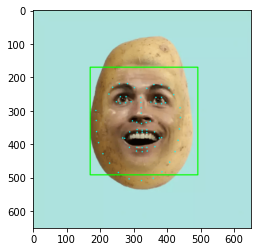

In [8]:
# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
            # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)

plt.imshow(img_show)
    # 이미지를 준비
plt.show()
    # 이미지를 출력

#### Step 5. 스티커 적용
##### 좌표 확인

In [9]:
#랜드마크를 기준으로 '눈썹 위 얼굴 중앙' 에 스티커를 적용
#구현 방법: 위 그림처럼 코 중심을 기준으로 높이 x 이상에 그리기, 눈썹 위 n 픽셀 위에 스티커를 구현 등
##얼굴 위치, 카메라의 거리에 따라 픽셀 x 가 다르기 때문에 비율로 계산을 해줘야 함

# zip() : 두 그룹의 데이터를 서로 엮어주는 파이썬의 내장 함수
# dlib_rects와 list_landmarks 데이터를 엮어 주었음
# dlib_rects : 얼굴 영역을 저장하고 있는 값
# list_landmarks : 68개의 랜드마크 값 저장(이목구비 위치(x,y))

for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[33]) # 코끝의 index는 33 
    x = landmark[33][0] # 이미지에서 코끝의 x값
    y = landmark[33][1] # 이미지에서 코끝의 x값
    w = h = dlib_rect.width() # 얼굴 영역의 가로를 차지하는 픽셀의 수 → max(x) - min(x) +1(픽셀의 수 이기 때문에 1을 더해줌 → 픽셀 수는 점 하나로도 1이 됨)
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(323, 338)
(x,y) : (323,338)
(w,h) : (322,322)


##### 스티커 이미지 가져오고 원본 이미지에 스티커 이미지를 추가하기 위해서 x, y 좌표를 조정

In [10]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/whisker.png' # 수염 이미지의 경로
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러오기 // cv2.imread(이미지 경로) → image객체 행렬을 반환
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수 // cv2.resize(image객체 행렬, (가로 길이, 세로 길이))
print (img_sticker.shape) # 사이즈를 조정한 수염 이미지의 차원 확인

# x,y,w,h 모두 위에서 반복문 안에서 지정해준 값임
refined_x = x - w // 2 
refined_y = y - h // 2 
# 원본 이미지에 스티커 이미지를 추가하기 위해서 x, y 좌표를 조정함, 이미지 시작점은 top-left 좌표
# 즉, refined_x, refined_y값에서 수염 이미지가 시작됨
print (f'(x,y) : ({refined_x},{refined_y})') 

# 음수 발생시 : 이미지 범위를 벗어남
# opencv는 ndarray데이터를 사용하는데, ndarray는 음수인덱스에 접근 불가하므로 스티커 이미지를 잘라 줘야 함

(322, 322, 3)
(x,y) : (162,177)


##### 음수값 있을 시 초과 크기만큼 스티커를 crop 하고, top 의 x좌표와 y 좌표를 각각의 경우에 맞춰 원본 이미지의 경계 값으로 수정

In [11]:
# 수염 이미지가 이미지 밖에서 시작하지 않도록 조정이 필요함
# 좌표 순서가 y,x임에 유의 (y,x,rgb channel)
# 음수값 만큼 수염 이미지(혹은 추후 적용할 스티커 이미지)를 자른다.
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
# 수염 이미지를 씌우기 위해 수염 이미지가 시작할 y좌표 값 조정
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :] 
    refined_y = 0

print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (162,177)


##### 원본 이미지에 스티커 적용

In [12]:
#sticker_area는 원본이미지에서 스티커를 적용할 위치를 crop한 이미지
#스티커 이미지에서 사용할 부분은 0 이 아닌 색이 있는 부분을 사용
#np.where를 통해 img_sticker 가 0 인 부분은 sticker_area를 사용
##0이 아닌 부분을 img_sticker를 사용

#img_show 에 다시 적용
# sticker_area는 원본이미지에서 스티커를 적용할 위치를 crop한 이미지
# 좌표 순서가 y,x임에 유의 (y,x,rgb channel)
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# 수염 이미지에서 사용할 부분은 0이 아닌 색이 있는 부분을 사용

img_sticker_gray = cv2.cvtColor(img_sticker, cv2.COLOR_BGR2GRAY)
_, img_sticker_mask = cv2.threshold(img_sticker_gray, 1, 255, cv2.THRESH_BINARY_INV)

img_sticker_mask_inv = cv2.bitwise_not(img_sticker_mask)

background = cv2.bitwise_and(sticker_area, sticker_area, mask=img_sticker_mask_inv)

# Apply the sticker to the image
foreground = cv2.bitwise_and(img_sticker, img_sticker, mask=img_sticker_mask)
img_sticker_added = cv2.addWeighted(background, 1, foreground, 1, 0)

# 나머지 부분은 img_sticker를 적용
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = img_sticker_added.astype(np.uint8)

##### 결과 이미지 출력

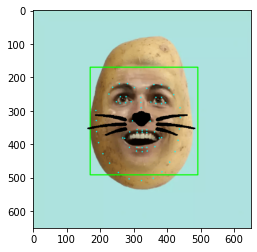

In [13]:
# 수염 이미지를 적용한 이미지
# 얼굴 영역과 랜드마크를 미리 적용해놓은 img_show에 수염 이미지를 덧붙인 이미지
plt.imshow(img_show)
plt.show()

##### bounding box와 landmark를 제거하고 최종 결과만 출력

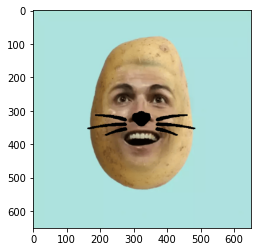

In [15]:
#img_show 대신 img_bgr을 활용

# 수염 이미지
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_sticker_gray = cv2.cvtColor(img_sticker, cv2.COLOR_BGR2GRAY)
_, img_sticker_mask = cv2.threshold(img_sticker_gray, 1, 255, cv2.THRESH_BINARY_INV)

img_sticker_mask_inv = cv2.bitwise_not(img_sticker_mask)

background = cv2.bitwise_and(sticker_area, sticker_area, mask=img_sticker_mask_inv)

foreground = cv2.bitwise_and(img_sticker, img_sticker, mask=img_sticker_mask)
img_sticker_added = cv2.addWeighted(background, 1, foreground, 1, 0)

img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = img_sticker_added.astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) 
plt.show()


##### Step 6. 문제점 찾아보기

In [ ]:
# 작업을 날려먹어 복구 과정에 시간이 너무 걸렸다 
# 해결해야 할 문제
# 1. 스티커의 투명도를 높여 뒤의 얼굴이 비쳐보여 더 자연스럽게 만들기 (cv2.addWeighted() 활용)
# 2. 얼굴 각도에 따라 스티커 변화시키기 (얼굴 각도에 따라 스티커 각도 및 입체 회전)
# 3. 멀리서 촬영 (이미지가 너무 작음?) 옆으로 누워서 촬영하면 (얼굴 인식 어려움 내지는 스티커 이미지 회전 필요?)
# 4. 실행 속도 (너무 오래 걸리면 앱 선호도가 낮을 것)
# 5. 정확도 (정확하지 않으면 앱 선호도가 낮을 것)

평가문항 (상세기준)
1. 자기만의 카메라앱 기능 구현을 완수하였다. \                                         (얼굴 영역과 랜드마크를 정확하게   검출하고, 스티커 사진을 합성시키는 데 성공하였다.)
2. 스티커 이미지를 정확한 원본 위치에 반영하였다.\	                                  (정확한 좌표계산을 통해 고양이 수염의 위치가 원본 얼굴에 잘 어울리게 출력되었다.)
3. 카메라 스티커앱을 다양한 원본이미지에 적용했을 때의 문제점을 체계적으로 분석하였다.\	            
(얼굴각도, 이미지 밝기, 촬영거리 등 다양한 변수에 따른 영향도를 보고서에 체계적으로 분석하였다.)